epoch:0, train acc:0.11666666666666667, test acc:0.1109
epoch:1, train acc:0.13333333333333333, test acc:0.1191
epoch:2, train acc:0.16333333333333333, test acc:0.1309
epoch:3, train acc:0.18, test acc:0.1433
epoch:4, train acc:0.2, test acc:0.1523
epoch:5, train acc:0.25, test acc:0.1713
epoch:6, train acc:0.26, test acc:0.1806
epoch:7, train acc:0.2866666666666667, test acc:0.1942
epoch:8, train acc:0.29333333333333333, test acc:0.2065
epoch:9, train acc:0.31333333333333335, test acc:0.219
epoch:10, train acc:0.34, test acc:0.2305
epoch:11, train acc:0.3466666666666667, test acc:0.238
epoch:12, train acc:0.35333333333333333, test acc:0.2464
epoch:13, train acc:0.35333333333333333, test acc:0.2497
epoch:14, train acc:0.36666666666666664, test acc:0.2647
epoch:15, train acc:0.39666666666666667, test acc:0.2611
epoch:16, train acc:0.42, test acc:0.279
epoch:17, train acc:0.45, test acc:0.3027
epoch:18, train acc:0.48333333333333334, test acc:0.3258
epoch:19, train acc:0.5, test acc:0.33

epoch:162, train acc:0.89, test acc:0.7252
epoch:163, train acc:0.88, test acc:0.7218
epoch:164, train acc:0.88, test acc:0.7193
epoch:165, train acc:0.88, test acc:0.7164
epoch:166, train acc:0.88, test acc:0.7199
epoch:167, train acc:0.89, test acc:0.7261
epoch:168, train acc:0.8866666666666667, test acc:0.7193
epoch:169, train acc:0.8933333333333333, test acc:0.7219
epoch:170, train acc:0.8866666666666667, test acc:0.7263
epoch:171, train acc:0.8833333333333333, test acc:0.7236
epoch:172, train acc:0.8866666666666667, test acc:0.7213
epoch:173, train acc:0.8866666666666667, test acc:0.7197
epoch:174, train acc:0.8933333333333333, test acc:0.7263
epoch:175, train acc:0.8966666666666666, test acc:0.7284
epoch:176, train acc:0.8866666666666667, test acc:0.7244
epoch:177, train acc:0.88, test acc:0.718
epoch:178, train acc:0.8766666666666667, test acc:0.7194
epoch:179, train acc:0.8766666666666667, test acc:0.7187
epoch:180, train acc:0.8933333333333333, test acc:0.7212
epoch:181, train

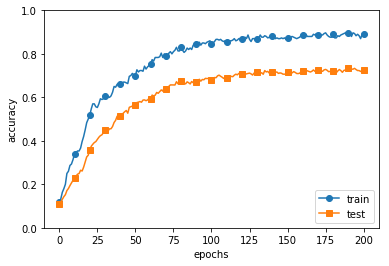

In [2]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()